# Columns
1) input: list of all columns + group (metadata)
2) df.drop(df.columns not in input_columns)

questions:
- how to know which column/row in metadata table has column names? if column metadata >2 columns? specify format?


Flow:
1) submit dataframe
2) optional: submit header
3) optional: submit lipid categories
4) how many column levels?
    4a) which column level would you like to use for table?
5) how many index levels (columns about lipids?)
    5a) which column contains individual lipid species?
6) which columns/indices would you like to drop?
    6a)

In [ ]:
import pandas as pd
header = pd.read_csv('data/csv/dgat/a1_header.csv')
header.T
# hT = header.T
# hT.columns = hT.iloc[0]
# hT = hT[1:]
# hT

In [ ]:
df_a1 = pd.read_csv('data/csv/dgat/a1_pmol.csv')
df_a1.set_index(list(df_a1.columns[:3]), inplace=True)
df_a1.columns = [list(df_a1.columns), list(df_a1.iloc[0]), list(df_a1.iloc[1])]
df_a1 = df_a1.droplevel('Unnamed: 0', axis=0)
df_a1 = df_a1[2:]
df_a1

In [ ]:
df_a3 = pd.read_csv('data/csv/dgat/a3_pmol.csv')

In [ ]:
num_idx = 1
num_col_lvls=3
df_a3.iloc[num_col_lvls:, :num_idx].reset_index(drop=True)
df_a3.set_index(list(df_a3.columns[:num_idx]), inplace=True)
df_a3

In [ ]:
num_col_lvls = 3
cols = [list(df_a3.columns)]
for n in range(num_col_lvls - 1):
    cols.append(list(df_a3.iloc[n]))
df_a3.columns = cols
df_a3 = df_a3[num_col_lvls - 1:]

In [ ]:
df_a3

In [ ]:
hT = header.T
df = pd.read_csv('data/csv/dgat/a1_pmol.csv')
ds = df.set_index('feature')
dd = ds.drop(columns=list(ds.columns[:2]))

In [ ]:
dc = dd.drop(columns = list(dd.columns[~dd.columns.isin(hT.index)]))
dc.iloc[2:].rename(columns=hT[0])

In [ ]:
dfc = df.drop(columns=df.columns[:3])
dfc[:3-1].T

In [ ]:
import numpy as np
h = pd.DataFrame(np.vstack([header.columns, header]))
h.columns = [str(l) for l in range(0,len(h.columns))]
h.index += 1
h2 = h.reset_index()
h2.set_index('index', inplace=True)
ccol = 3
mcol = 2
cols = {}
h2t = h2.T
# for cohort in h2t[ccol].unique():
#     cols[cohort] =  h2t[h2t[ccol]]

In [ ]:
h2t[ccol].unique()

In [ ]:
one = h2t[h2t[ccol] == 'Control'][1]
mm = h2t[h2t[ccol] == 'Control'][mcol]
drop = dict(zip(one,mm))
drop

In [ ]:
dd.columns[~dd.columns.isin(('86', '94', '110', '112', '117'))]

In [ ]:
drop.keys()

In [ ]:
de = dd.copy()

In [ ]:
de

In [ ]:
dd.reset_index(inplace=True)

In [ ]:
de

In [15]:
import functions
import matplotlib as mpl
c = functions.maskedcmap(-10,10)

In [24]:
cmap = mpl.colormaps['PRGn']
cmap(1.3)

(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)

In [25]:
cmap(1)

(0.25928489042675895, 0.006459054209919261, 0.3027297193387159, 1.0)

In [27]:
cmap(0.5)

(0.966320645905421, 0.9680891964628989, 0.9658592848904267, 1.0)

In [28]:
n = 5.9
n = int((n + 10) / 10) * 10

/var/folders/s5/_kqw0_w551n9bnyrwxz4skwc0000gn/T/ipykernel_21594/3863369244.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('PRGn', 256)


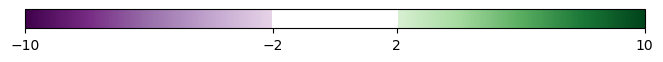

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

cmap = mpl.cm.get_cmap('PRGn', 256)
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
maskedcolors = cmap(np.linspace(0, 1, 256))
black = np.array([1, 1, 1, 1])
maskedcolors[int(round(norm(-2) * 256)) : int(round(norm(2) * 256))] = black
maskedcmp = mpl.colors.ListedColormap(maskedcolors)

fig, ax = plt.subplots(figsize=(8, .5))
cbar = mpl.colorbar.ColorbarBase(ax, cmap=maskedcmp, norm=norm, orientation='horizontal', ticks=[-10, -2, 2, 10])
fig.subplots_adjust(bottom=0.5)
plt.show()

In [1]:
n = 5.9
n - (n%5) + 5

10.0